# Exercise 8.1
### Introduction
$$ {dV_{out} \over dt} = {1 \over RC}(V_{in}-V_{out})$$
Above is the differential equation for $V_out$. $V_{in} = 1$ if $2t$ rounded down is even and $V_{in} = -1$ if $2t$ rounded down is odd. 

A) Plot $t=0$ to $t=10$ for $RC=0.01,0.1,1$ using fourth-order Runge-Kutta

B) What is happening?

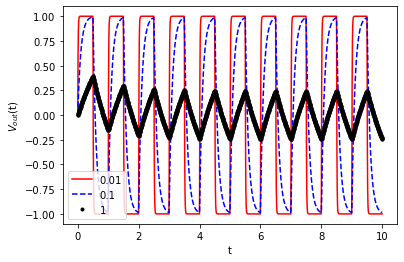

In [74]:
from math import sin
import numpy as np
from pylab import plot,xlabel,ylabel,show,legend

def f(Vout,t,RC):
    if np.floor(2*t)%2 == 0:
        Vin = 1
    else:
        Vin = -1
    return 1/RC*(Vin-Vout)

a = 0.0
b = 10.0
N = 2000
h = (b-a)/N
RC = [0.01,0.1,1]
colors = ['r-','b--','k.']
count = 0
tpoints = np.arange(a,b,h)
Voutpoints = []
Vout = 0.0
for rc in RC:
    Voutpoints = []
    Vout = 0.0
    for t in tpoints:
        Voutpoints.append(Vout)
        k1 = h*f(Vout,t,rc)
        k2 = h*f(Vout+0.5*k1,t+0.5*h,rc)
        k3 = h*f(Vout+0.5*k2,t+0.5*h,rc)
        k4 = h*f(Vout+k3,t+h,rc)
        Vout += (k1+2*k2+2*k3+k4)/6

    plot(tpoints,Voutpoints,colors[count],label=rc)
    count +=1
    
xlabel("t")
ylabel(r"$V_{out}$(t)")
legend()
show()

### Conclusion
I haven't taken E&M yet, but this looks like an AC circuit if I had to guess. It alternates between positive and negative. 

# Exercise 8.3
### Introduction
$$ {dx \over dt} = \sigma (y-x)$$
$$ {dy \over dt} = rx-y-xz$$
$$ {dz \over dt} = xy-bz$$
Above are the Lorenz transformation.

A) $\sigma = 10, r = 28, b = {8 \over 3}$ and solve it from t = 0 to t = 50. Initial conditions of (x,y,z) = (0,1,0).  Then plot y as a function of time.

B) Plot z v x

### Eulers Method

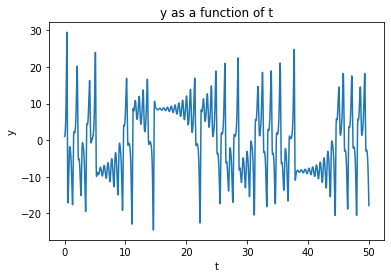

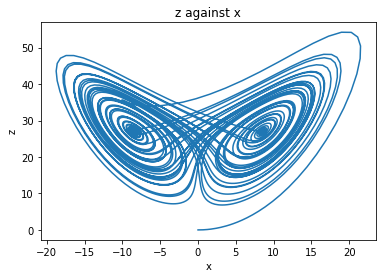

In [75]:
import matplotlib.pyplot as plt

σ = 10
r = 28
b = 8/3
dt = 0.01
times = np.arange(0,50,dt)
x = [0]
y = [1]
z = [0]

for t in times:
    dx = dt*σ*(y[-1]-x[-1])
    dy = dt*(r*x[-1]-y[-1]-x[-1]*z[-1])
    dz = dt*(x[-1]*y[-1]-b*z[-1])
    x.append(x[-1]+dx)
    y.append(y[-1]+dy)
    z.append(z[-1]+dz)
plt.plot(times,y[:-1])
plt.title('y as a function of t')
plt.ylabel('y')
plt.xlabel('t')
plt.show()

#Part B
plt.plot(x,z)
plt.title('z against x')
plt.ylabel('z')
plt.xlabel('x')
plt.show()

### 4th Order Runge-Kutta

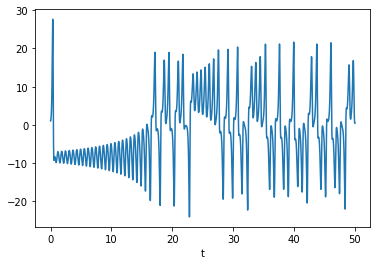

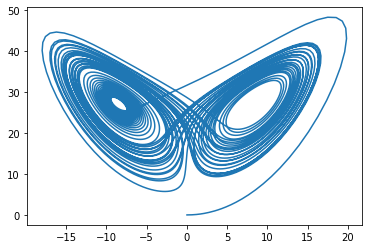

In [76]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    dx = σ*(y-x)
    dy = (R*x-y-x*z)
    dz = (x*y-B*z)
    return array([dx,dy,dz],float)

a = 0.0
b = 50
N = 5000
h = (b-a)/N
σ = 10
R = 28
B = 8/3
tpoints = arange(a,b,h)
xpoints = []
ypoints = []
zpoints = []

r = array([0,1,0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plot(tpoints,ypoints)
xlabel("t")
show()
plot(xpoints,zpoints)
show()

### Conclusion
Wow. This is cool. I had no idea what to expect and this is awesome. For the first part, I had dt too big and it looked very different. I even sent my wife a picture of this because I thought it was so cool.
Anyway, I used Euler's method at first because that is what I am comfortable with, but then decided to do Runge-Kutta too.

# Euler's Method & Runge-Kutta In Class
### Introduction
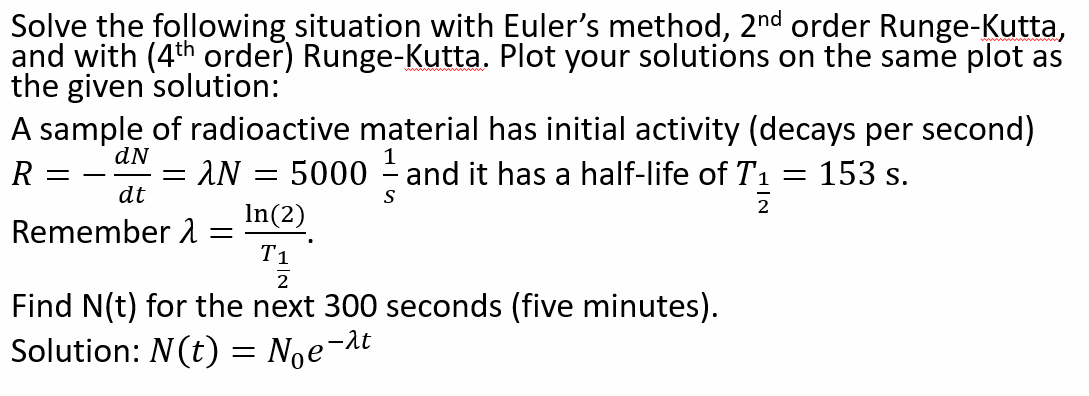



#### Euler's Method

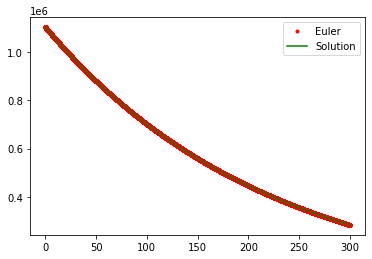

Wall time: 6.83 s


In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt

tfinal = 300
R0 = 5000
Thalf = 153
λ = np.log(2)/Thalf
N0 = R0/λ
N = 1e6
dt = tfinal/N


times = [0]
Ns = [N0]

while times[-1]<=tfinal:
    dN = -λ*Ns[-1]*dt
    Ns.append(Ns[-1]+dN)
    times.append(times[-1]+dt)
    
plt.plot(times,Ns,'r.',label='Euler')

#Actual
t = np.arange(0,300,dt)
N = N0*np.exp(-λ*t)

plt.plot(t,N,'g-',label='Solution')


plt.legend()
plt.show()

#### 2nd Order Runge-Kutta

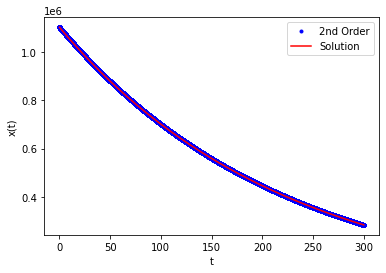

Wall time: 11.2 s


In [2]:
%%time
from math import sin
from numpy import arange, log
from pylab import plot,xlabel,ylabel,show

def f(N,t):
    Thalf = 153
    λ = log(2)/Thalf
    return -λ*N

a = 0.0
b = 300
N = 1e6
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []

N = N0
for t in tpoints:
    xpoints.append(N)
    k1 = h*f(N,t)
    k2 = h*f(N+0.5*k1,t+0.5*h)
    N += k2

plot(tpoints,xpoints,'b.',label='2nd Order')
xlabel("t")
ylabel("x(t)")

#Actual
t = np.arange(0,300,dt)
N = N0*np.exp(-λ*t)

plt.plot(t,N,'r-',label='Solution')


plt.legend()
show()

#### 4th Order Runge-Kutta

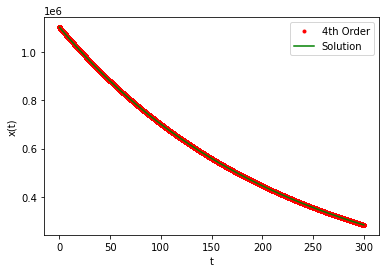

Wall time: 21.7 s


In [3]:
%%time
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    Thalf = 153
    λ = log(2)/Thalf
    return -λ*N

a = 0.0
b = 300
N = 1e6
h = (b-a)/N

tpoints = arange(a,b,h)
Npoints = []
N = N0

for t in tpoints:
    Npoints.append(N)
    k1 = h*f(N,t)
    k2 = h*f(N+0.5*k1,t+0.5*h)
    k3 = h*f(N+0.5*k2,t+0.5*h)
    k4 = h*f(N+k3,t+h)
    N += (k1+2*k2+2*k3+k4)/6

plot(tpoints,Npoints,'r.',label='4th Order')
xlabel("t")
ylabel("x(t)")

#Actual
t = np.arange(0,300,dt)
N = N0*np.exp(-λ*t)

plt.plot(t,N,'g-',label='Solution')


plt.legend()
show()

### Conclusion
The higher the order, the more time each calculation takes. It doubles pretty much every time. However, the accuracy increases.